https://www.youtube.com/watch?v=i-MF3CXWWEM&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=4

# Feature Selection-Information gain - mutual information In Regression Problem Statements

## Mutual Information

Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

## 1. Load the Libraries

In [1]:
import pandas as pd
import numpy as np

## 2. Load the dataset

Dataset Source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Objective: 

To select best features based on continous target variable `SalesPrice`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3. Look for missing values 

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## 4. Extract Numerical Columns

In [5]:
numerical_features = df.select_dtypes(include=['int16','int32','int64','float16','float32','float64'])
len(numerical_features)

1460

In [8]:
numerical_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


## 5. Update the original dataframe with just nuerical columns

In [9]:
df = numerical_features
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## 6. Dependent and Independent features

In [12]:
X = df.drop(['SalePrice', 'Id'], axis=1) # Independent features
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [11]:
y = df[['SalePrice']]  # Dependent variable
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


## 7. Split Dataset into Train and test set to avoid overfitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [15]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009


## 8. Feature selection with mutual_info_regression technique

More on:https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

In [16]:
from sklearn.feature_selection import mutual_info_regression 

In [20]:
# apply mutual info regression on X_train and y_train
# fill the null values with 0 for X_train.
mutual_info_reg = mutual_info_regression(X_train.fillna(0),y_train)
mutual_info_reg

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.25362956, 0.204735  , 0.16629412, 0.52664783, 0.10788971,
       0.34801508, 0.23561754, 0.0907032 , 0.16252628, 0.        ,
       0.11092637, 0.38470599, 0.31280208, 0.22576394, 0.0045291 ,
       0.48242199, 0.02360523, 0.        , 0.25626132, 0.08087081,
       0.05423273, 0.021435  , 0.18986778, 0.18741212, 0.27087538,
       0.36402597, 0.36744299, 0.07642675, 0.17539622, 0.01713055,
       0.00421087, 0.04180995, 0.00118993, 0.        , 0.        ,
       0.00756529])

**Inference:**

- Higher the value, more important the feature is. 
- All the values will be between 0 and 1.
- Higher the value, more dependent that feature with respect to the dependent feature `SalePrice`



## 9. Convert arrays to series and set the index.

In [22]:
mutual_reg_data = pd.Series(mutual_info_reg)
mutual_reg_data

0     0.253630
1     0.204735
2     0.166294
3     0.526648
4     0.107890
5     0.348015
6     0.235618
7     0.090703
8     0.162526
9     0.000000
10    0.110926
11    0.384706
12    0.312802
13    0.225764
14    0.004529
15    0.482422
16    0.023605
17    0.000000
18    0.256261
19    0.080871
20    0.054233
21    0.021435
22    0.189868
23    0.187412
24    0.270875
25    0.364026
26    0.367443
27    0.076427
28    0.175396
29    0.017131
30    0.004211
31    0.041810
32    0.001190
33    0.000000
34    0.000000
35    0.007565
dtype: float64

In [23]:
mutual_reg_data.index = X_train.columns

In [24]:
mutual_reg_data

MSSubClass       0.253630
LotFrontage      0.204735
LotArea          0.166294
OverallQual      0.526648
OverallCond      0.107890
YearBuilt        0.348015
YearRemodAdd     0.235618
MasVnrArea       0.090703
BsmtFinSF1       0.162526
BsmtFinSF2       0.000000
BsmtUnfSF        0.110926
TotalBsmtSF      0.384706
1stFlrSF         0.312802
2ndFlrSF         0.225764
LowQualFinSF     0.004529
GrLivArea        0.482422
BsmtFullBath     0.023605
BsmtHalfBath     0.000000
FullBath         0.256261
HalfBath         0.080871
BedroomAbvGr     0.054233
KitchenAbvGr     0.021435
TotRmsAbvGrd     0.189868
Fireplaces       0.187412
GarageYrBlt      0.270875
GarageCars       0.364026
GarageArea       0.367443
WoodDeckSF       0.076427
OpenPorchSF      0.175396
EnclosedPorch    0.017131
3SsnPorch        0.004211
ScreenPorch      0.041810
PoolArea         0.001190
MiscVal          0.000000
MoSold           0.000000
YrSold           0.007565
dtype: float64

## 10. Find top most important features

In [26]:
data_sorted= mutual_reg_data.sort_values(ascending=False)
data_sorted

OverallQual      0.526648
GrLivArea        0.482422
TotalBsmtSF      0.384706
GarageArea       0.367443
GarageCars       0.364026
YearBuilt        0.348015
1stFlrSF         0.312802
GarageYrBlt      0.270875
FullBath         0.256261
MSSubClass       0.253630
YearRemodAdd     0.235618
2ndFlrSF         0.225764
LotFrontage      0.204735
TotRmsAbvGrd     0.189868
Fireplaces       0.187412
OpenPorchSF      0.175396
LotArea          0.166294
BsmtFinSF1       0.162526
BsmtUnfSF        0.110926
OverallCond      0.107890
MasVnrArea       0.090703
HalfBath         0.080871
WoodDeckSF       0.076427
BedroomAbvGr     0.054233
ScreenPorch      0.041810
BsmtFullBath     0.023605
KitchenAbvGr     0.021435
EnclosedPorch    0.017131
YrSold           0.007565
LowQualFinSF     0.004529
3SsnPorch        0.004211
PoolArea         0.001190
BsmtFinSF2       0.000000
BsmtHalfBath     0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

## 11. Plot the ordered mutual inforamation values per feature using barplot

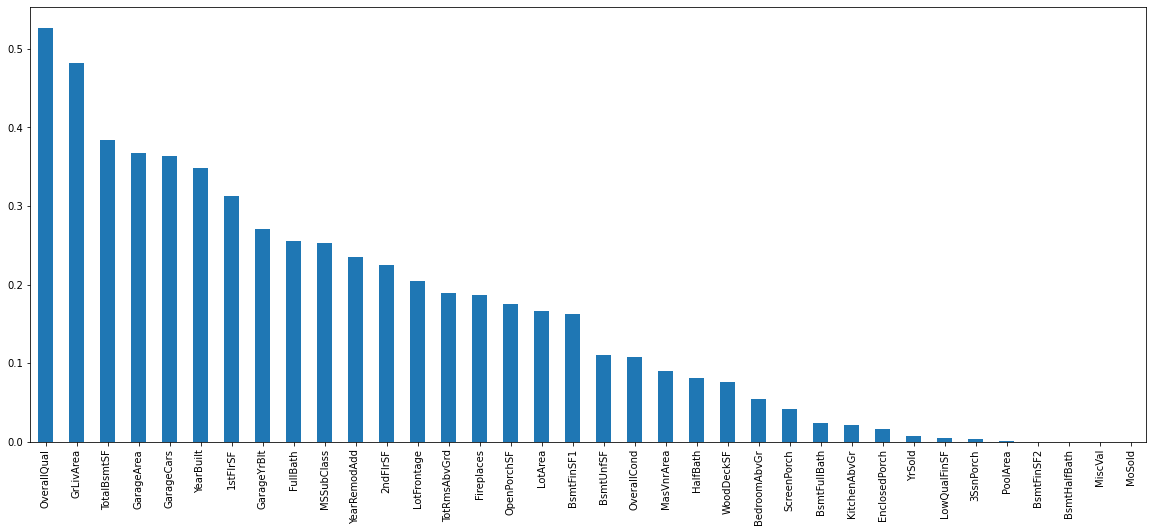

In [27]:
data_sorted.plot.bar(figsize=(20,8))

**Inference:**

Top most important feature is `OverallQual` with a value 0.52. this feature is more dependent to `SalePrice`


## 12. Select the top 20 percentile out of all the features

In [28]:
from sklearn.feature_selection import SelectPercentile

In [29]:
select_top_20_cols = SelectPercentile(score_func=mutual_info_regression, percentile=20)
select_top_20_cols

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f7e98b91200>)

## 13. Fit X_train and y_train on top 20 features.

In [31]:
select_top_20_cols.fit(X_train.fillna(0), y_train)
X_train.columns[select_top_20_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

**Inference:**

['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','GarageCars', 'GarageArea'] 

Above features are the top 20th percentile. It also means 80% of total population having dependency < `GarageCars` feature.

## Difference Between Information Gain And Mutual Information:


**I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)**

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.